<br></br>
<font size=5 face=雅黑>1. 预训练 + 微调范式</font>
<br></br>
自然语言处理领域一直在发展变化，能够在各种任务上达到最优效果的模型、算法也层出不穷。最早的范式是文本表示+ 机器学习，如基础 Baseline 所演示的方法，通过将自然语言文本表示为数值向量，再建立统计机器学习模型实习下游任务。但随着深度学习的发展，自2013年，神经网络词向量登上时代舞台，神经网络逐渐成为了 NLP 的核心方法，NLP 的核心研究范式逐渐向深度学习演化。
<br></br>
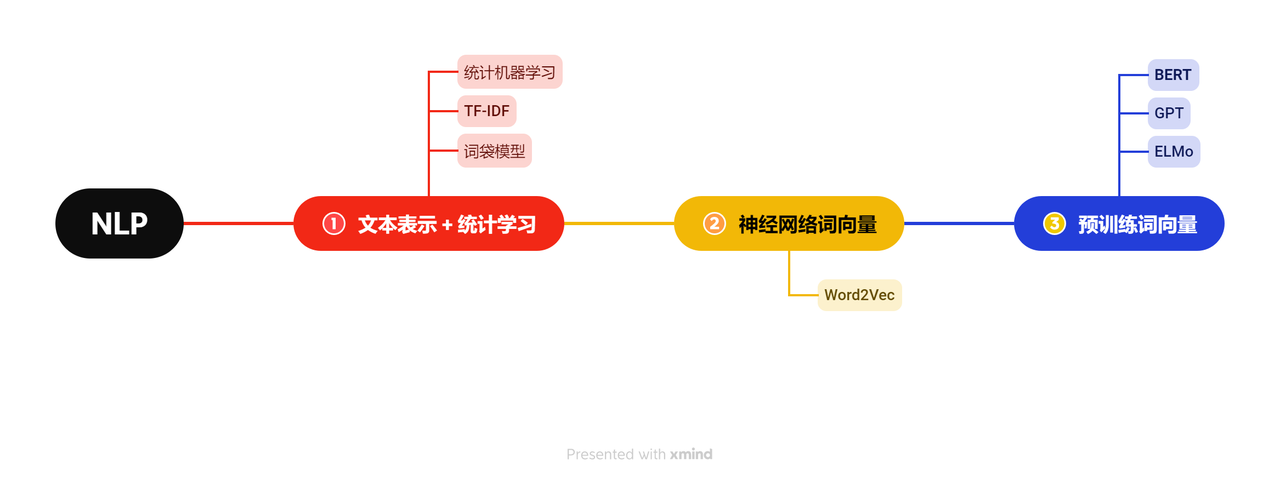
<br></br>
深度学习的研究方法，主要是通过多层的神经网络来端到端处理下游任务，将文本表示、特征工程、建模预测都融合在深度神经网络中，减少了人工特征构建的过程，显著提升了自然语言处理能力。神经网络词向量是其中的核心部分，即文本通过神经网络后的向量表示，这些向量表示能够蕴含深层语义且维度合适，后续研究往往可以直接使用以替代传统的文本表示方法，典型的应用如 Word2Vec。
<br></br>
但是，Word2Vec 是静态词向量，即对于每一个词有一个固定的向量表示，无法解决一词多义、复杂特征等问题。2018年，ELMo 模型的提出拉开了动态词向量、预训练模型的时代大幕。ELMo 模型基于双向 LSTM 架构，在训练数据上基于语言模型进行预训练，再针对下游任务进行微调，表现出了更加优越的性能，标志着预训练+微调范式的诞生。
<br></br>
所谓预训练+微调范式，指先在海量文本数据上进行预训练，再针对特定的下游任务进行微调。预训练一般基于语言模型，即给定上一个词，预测下一个词。语言模型可以在所有文本数据上建模，无需人工标注，因此很容易在海量数据上进行训练。通过在海量数据上进行预训练，模型可以学习到深层的自然语言逻辑。再通过在指定的下游任务上进行微调，即针对部分人工标注的任务数据进行特定训练，如文本分类、文本生成等，来训练模型执行下游任务的能力。
<br></br>
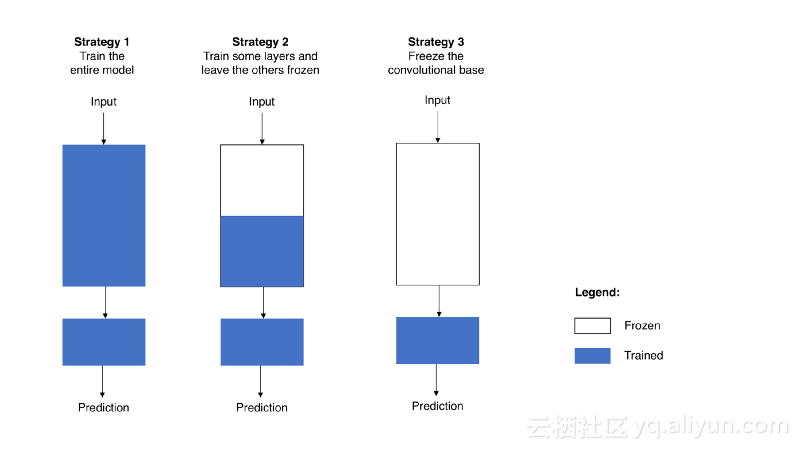
<br></br>
预训练+微调范式一定程度上缓解了标注数据昂贵的问题，显著提升了模型性能，但是，ELMo 使用的双向 LSTM 架构存在难以解决长期依赖、并行效果差的天生缺陷，ELMo 本身也保留了词向量作为特征输入的应用，并没能一锤定音地敲定预训练+微调范式的主流地位。2017年，Transformer 模型的提出，为自然语言处理领域带来了一个新的重要成员——Attention 架构。基于 Attention 架构，同样在2018年，OpenAI 提出的 GPT 模型基于 Transformer 模型，结合 ELMo 模型提出的预训练+微调范式，进一步刷新了众多自然语言处理任务的上限。2023年爆火出圈的 ChatGPT 就是以 GPT 模型作为基础架构的。
<br></br>
从静态编码到神经网络计算的静态词向量，再到基于双向 LSTM 架构的预训练+微调范式，又诞生了基于 Transformer的预训练+微调模式，预训练模型逐步成为自然语言处理的主流。但，真正奠定预训练+微调范式的重要地位的，还是之后提出的 BERT。BERT 可以说是综合了 ELMo 和 GPT，使用预训练+微调范式，基于 Transformer 架构而抛弃了存在天生缺陷的 LSTM，又针对 GPT 仅能够捕捉单向语句关系的缺陷提出了能够捕捉深层双向语义关系的 MLM 预训练任务，从而将预训练模型推向了一个高潮。
<br></br>
<font size=5 face=雅黑>2. Transformer 与 Attention</font>
<br></br>
BERT 乃至目前正火的 LLM 的成功，都离不开 Attention 机制与基于 Attention 机制搭建的 Transformer 架构。此处简单介绍 Transformer 与 Attention 机制。
<br></br>
在 Attention 机制提出之前，深度学习主要有两种基础架构：卷积神经网络（CNN）与循环神经网络（RNN）。其中，CNN 在 CV 领域表现突出，而 RNN 及其变体 LSTM 在 NLP 方向上一枝独秀。然而，RNN 架构存在两个天然缺陷：① 序列依序计算的模式限制了计算机并行计算的能力，导致 RNN 为基础架构的模型虽然参数量不算特别大，但计算时间成本却很高。 ② RNN 难以捕捉长序列的相关关系。在 RNN 架构中，距离越远的输入之间的关系就越难被捕捉，同时 RNN 需要将整个序列读入内存依次计算，也限制了序列的长度。
<br></br>
针对上述两个问题，​ 2017年 Vaswani 等人发表了论文《Attention Is All You Need》，创造性提出了 Attention 机制并完全抛弃了 RNN 架构。Attention 机制最先源于计算机视觉领域，其核心思想为当我们关注一张图片，我们往往无需看清楚全部内容而仅将注意力集中在重点部分即可。而在自然语言处理领域，我们往往也可以通过将重点注意力集中在一个或几个 token，从而取得更高效高质的计算效果。
<br></br>
Attention 机制的特点是通过计算 Query (查询值)与 Key (键值)的相关性为真值加权求和，从而拟合序列中每个词同其他词的相关关系。其大致计算过程如图：
<br></br>
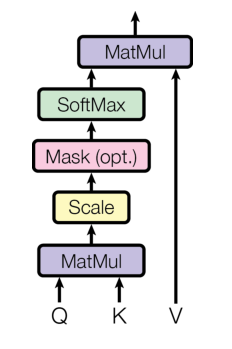
<br></br>
具体而言，可以简单理解为一个输入序列通过不同的参数矩阵映射为 Q、K、V 三个矩阵，其中，Q 是计算注意力的另一个句子（或词组），V 为待计算句子，K 为待计算句子中每个词的对应键。通过对 Q 和 K 做点积，可以得到待计算句子（V）的注意力分布（即哪些部分更重要，哪些部分没有这么重要），基于注意力分布对 V 做加权求和即可得到输入序列经过注意力计算后的输出，其中与 Q （即计算注意力的另一方）越重要的部分得到的权重就越高。
<br></br>
而 Transformer 正是基于 Attention 机制搭建了 Encoder-Decoder（编码器-解码器）结构，主要适用于 Seq2Seq（序列到序列）任务，即输入是一个自然语言序列，输出也是一个自然语言序列。其整体架构如下：
<br></br>
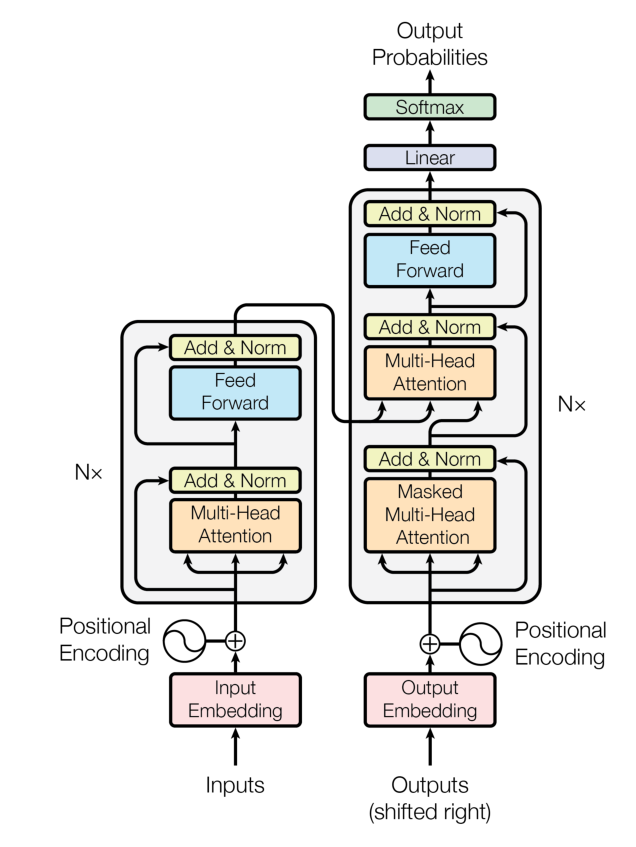
<br></br>
Transformer 由一个 Encoder，一个 Decoder 外加一个 Softmax 分类器与两层编码层构成。上图中左侧方框为 Encoder，右侧方框为 Decoder。
<br></br>
由于是一个 Seq2Seq 任务，在训练时，Transformer 的训练语料为若干个句对，具体子任务可以是机器翻译、阅读理解、机器对话等。在原论文中是训练了一个英语与德语的机器翻译任务。在训练时，句对会被划分为输入语料和输出语料，输入语料将从左侧通过编码层进入 Encoder，输出语料将从右侧通过编码层进入 Decoder。Encoder 的主要任务是对输入语料进行编码再输出给 Decoder，Decoder 再根据输出语料的历史信息与 Encoder 的输出进行计算，输出结果再经过一个线性层和 Softmax 分类器即可输出预测的结果概率，整体逻辑如下图：
<br></br>
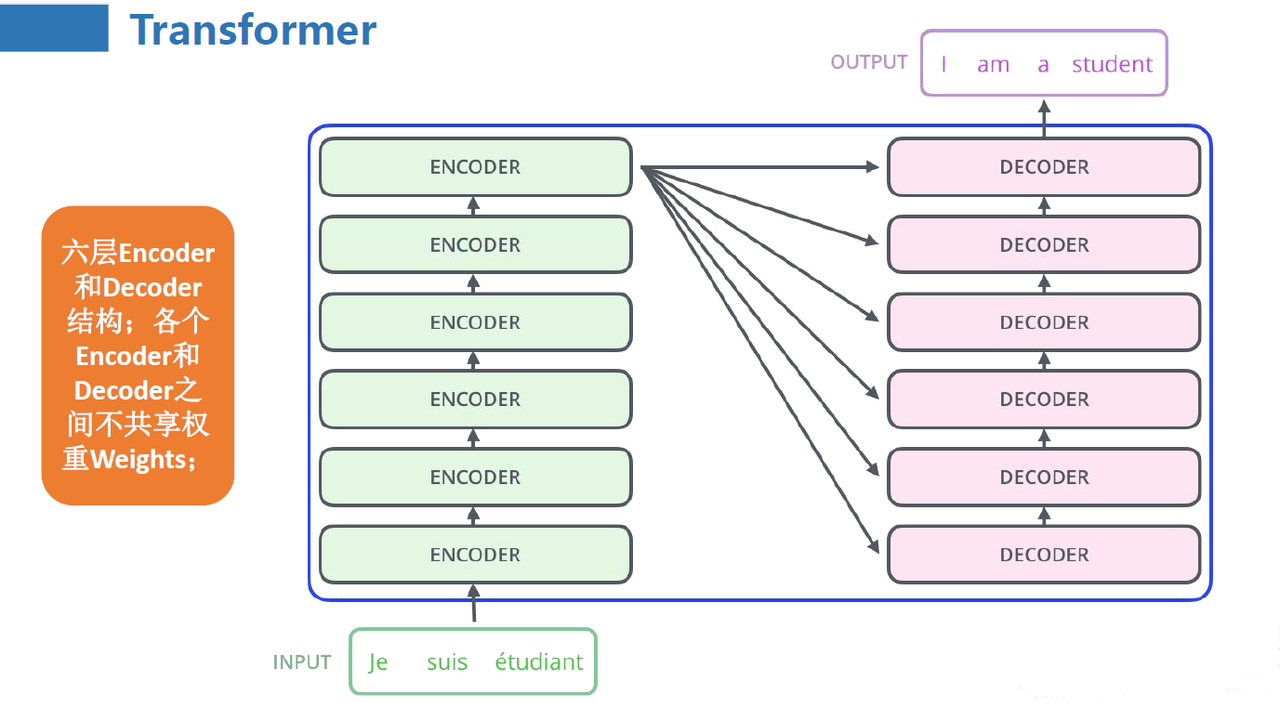
<br></br>
Transformer 整体是一个很值得探究的话题，此处不再赘述，如有感兴趣的同学欢迎阅读原论文《Attention Is All You Need》(<a href="https://arxiv.org/pdf/1706.03762.pdf">https://arxiv.org/pdf/1706.03762.pdf</a>) 与基于 Pytorch 的 <a href="https://github.com/datawhalechina/thorough-pytorch/blob/main/source/%E7%AC%AC%E5%8D%81%E7%AB%A0/Transformer%20%E8%A7%A3%E8%AF%BB.md">Transformer 源码解读</a>。
